In [ ]:
from google.colab import drive
import os 

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Hepsiburada Sentiment'

data_path = path + '/' + os.listdir(path)[0]

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras import optimizers

from sklearn.metrics import accuracy_score
    
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv(data_path)
data.head() 

df = data.copy()

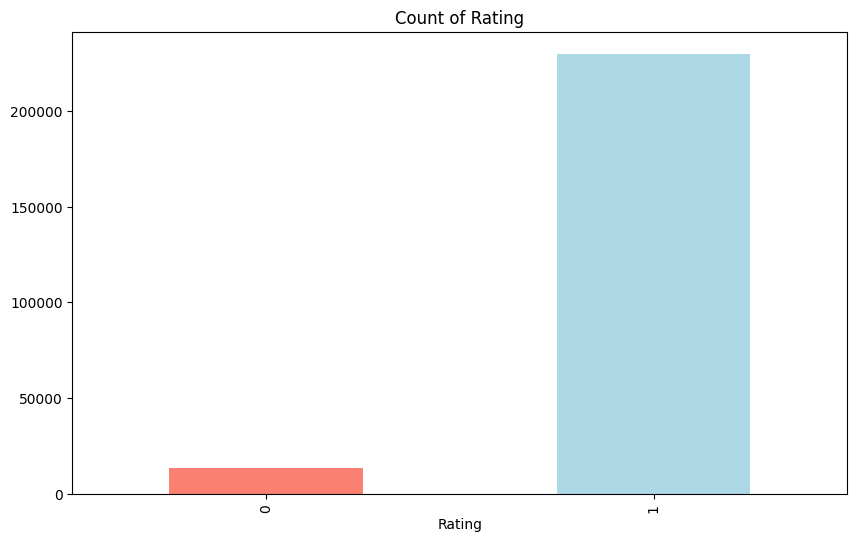

In [28]:
bar_plot = df['Rating'].value_counts().sort_index().plot(
    kind='bar', title='Count of Rating',color=['salmon', 'lightblue'], figsize=(10, 6)
)
bar_plot.set_xlabel('Rating')
plt.show()

In [4]:
y = df['Rating'].values
X = df['Review'].values     

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
print('normal length', len(X))
print('unique length', len(set(X)))

normal length 243497
unique length 214662


In [ ]:
# text_to_sequences is used to convert text to a list of integer sequences

tokenizer = Tokenizer(num_words=10000)
 
tokenizer.fit_on_texts(X)

X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [18]:
keys = list(tokenizer.word_index.keys())[:10]
values = list(tokenizer.word_index.values())[:10]

for key, value in zip(keys, values):
    print(key, value)   

çok 1
bir 2
ve 3
ürün 4
bu 5
iyi 6
güzel 7
için 8
tavsiye 9
ederim 10


In [24]:
num_tokens = np.array([len(token) for token in X_train_tokenized + X_test_tokenized])
num_tokens

array([21, 25, 17, ..., 18, 39, 21])

In [25]:
print('mean', num_tokens.mean())
print('std', num_tokens.std())
print('argmax', num_tokens.argmax())

mean 20.744703220162876
std 19.533556911847846
argmax 234980


In [26]:
np.concatenate((X_train, X_test))[num_tokens.argmax()]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [27]:
max_token = int(num_tokens.mean() + (2 * num_tokens.std()))
max_token

59

In [28]:
# 0.95 means that %95 of the data has less than max_token number of words
# %5 can be neglected 

(num_tokens < max_token).sum() / len(num_tokens)

0.9597982726686571

In [29]:
# pad_sequences is used to make all the sentences the same length

X_train_tokenized_pad = pad_sequences(X_train_tokenized, maxlen=max_token)
X_test_tokenized_pad = pad_sequences(X_test_tokenized, maxlen=max_token)

X_train_tokenized_pad.shape

(194797, 59)

In [30]:
X_train_tokenized[13]

[86, 32, 14, 7, 2, 4, 3294, 416]

In [31]:
X_train_tokenized_pad[13]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   86,   32,   14,    7,
          2,    4, 3294,  416])

In [50]:
word_index = tokenizer.word_index
inversed_word_idex = dict(zip(word_index.values(), word_index.keys()))

def show_text_from_tokens(tokens):

  words = [inversed_word_idex[token] for token in tokens if token !=0]
  return ' '.join(words)

show_text_from_tokens(X_train_tokenized_pad[13])

'fiyatına göre gayet güzel bir ürün ışıkta güçlü'

In [ ]:
# ?Embedding
"""
Init signature:
Embedding(
    input_dim, => is used to determine the size of the vocabulary.
    output_dim, => is used to determine the size of the embedding vectors.
    embeddings_initializer='uniform', => is used to initialize the embedding matrix.
    embeddings_regularizer=None, => is used to apply regularization to the embedding matrix.
    activity_regularizer=None,  => is used to apply regularization to the output of the layer.
    embeddings_constraint=None, => is used to apply constraints to the embedding matrix.
    mask_zero=False, => is used to specify whether or not the input value 0 is a special "padding" value that should be masked out.
    input_length=None, => is used to specify the length of input sequences.
    sparse=False, => is used to specify whether or not the input is sparse.
    **kwargs,
)
"""

# ?LSTM
"""
Init signature:
LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
"""


# ?GRU
"""
Init signature:
GRU(
    units, => is used to determine the output size of the GRU layer.
    activation='tanh', => is used to determine the activation function.
    recurrent_activation='sigmoid', => is used to determine the activation function for the recurrent step.
    use_bias=True, => is used to determine whether or not a bias vector will be used.
    kernel_initializer='glorot_uniform', => is used to initialize the kernel weights matrix.
    recurrent_initializer='orthogonal', => is used to initialize the recurrent weights matrix.
    bias_initializer='zeros', => is used to initialize the bias vector.
    kernel_regularizer=None, => is used to apply regularization to the kernel weights matrix.
    recurrent_regularizer=None, => is used to apply regularization to the recurrent weights matrix.
    bias_regularizer=None, => is used to apply regularization to the bias vector.
    activity_regularizer=None, => is used to apply regularization to the output of the layer.
    kernel_constraint=None, => is used to apply constraints to the kernel weights matrix.
    recurrent_constraint=None, => is used to apply constraints to the recurrent weights matrix.
    bias_constraint=None, => is used to apply constraints to the bias vector. 
    dropout=0.0, => is used to specify the dropout rate for the input units. 
    recurrent_dropout=0.0, => is used to specify the dropout rate for the recurrent units.
    return_sequences=False, => is used to specify whether or not the output of the layer will be a sequence. 
    return_state=False, => is used to specify whether or not the last state will be returned in addition to the output.
    go_backwards=False, => is used to specify the direction of the input sequence.
    stateful=False, => is used to specify whether or not the last state for each sample at index i in a batch will be used as initial state for the sample of index i in the following batch.
    unroll=False, => is used to specify whether or not the network will be unrolled.
    time_major=False, => is used to specify whether the first dimension represents the time steps. 
    reset_after=True, => is used to specify whether the reset gate is applied after or before the matrix multiplication.
...
"""

## What is the difference between LSTM and GRU?

differences table 

| LSTM | GRU |
| --- | --- |
| LSTM has three gates: input, output, and forget gate | GRU has two gates: reset and update gate |
| LSTM has a cell state that runs through the entire chain, whereas GRU has a hidden state that runs through the entire chain | GRU does not have a cell state like LSTM |
| LSTM is more complex than GRU | GRU is less complex than LSTM |

### LSTM(Long Short Term Memory) for Sentiment Analysis

In [52]:
model = Sequential()

model.add(
    Embedding(
        input_dim=10000,
        output_dim=50, 
        input_length=59
    )
)

model.add(LSTM(units=16, activation='tanh', return_sequences=True))
model.add(LSTM(units=8, activation='tanh', return_sequences=True))
model.add(LSTM(units=4, activation='tanh', return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 59, 50)            500000    
                                                                 
 lstm_18 (LSTM)              (None, 59, 16)            4288      
                                                                 
 lstm_19 (LSTM)              (None, 59, 8)             800       
                                                                 
 lstm_20 (LSTM)              (None, 4)                 208       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 505301 (1.93 MB)
Trainable params: 505301 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit(X_train_tokenized_pad, y_train, epochs=2)

Epoch 1/2
6088/6088 [==============================] - 411s 66ms/step - loss: 0.1277 - accuracy: 0.9586
Epoch 2/2
6088/6088 [==============================] - 420s 69ms/step - loss: 0.0765 - accuracy: 0.9734


In [59]:
model.evaluate(X_test_tokenized_pad, y_test)[1]

1522/1522 [==============================] - 20s 12ms/step - loss: 0.0862 - accuracy: 0.9696


0.9696098566055298

In [58]:
predicted = model.predict(X_test_tokenized_pad)  

1522/1522 [==============================] - 20s 12ms/step


In [60]:
y_pred_lstm = [1 if value >=0.5 else 0.0 for value in predicted]
y_pred_lstm[:10]

[1, 1, 1, 1, 1, 1, 1, 0.0, 1, 1]

In [61]:
accuracy_score(y_test, y_pred_lstm)

0.9696098562628337

### GRU(Gated Recurrent Unit) for Sentiment Analysis

In [62]:
model = Sequential()

model.add(Embedding(
    input_dim=10000,
    output_dim=50,
    input_length=59
))

model.add(GRU(units=16, activation='tanh', return_sequences=True))
model.add(GRU(units=8, activation='tanh', return_sequences=True))
model.add(GRU(units=4, activation='tanh', return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 59, 50)            500000    
                                                                 
 gru_3 (GRU)                 (None, 59, 16)            3264      
                                                                 
 gru_4 (GRU)                 (None, 59, 8)             624       
                                                                 
 gru_5 (GRU)                 (None, 4)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 504061 (1.92 MB)
Trainable params: 504061 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.fit(X_train_tokenized_pad, y_train, epochs=2)

Epoch 1/2
6088/6088 [==============================] - 467s 75ms/step - loss: 0.1695 - accuracy: 0.9523
Epoch 2/2
6088/6088 [==============================] - 419s 69ms/step - loss: 0.0830 - accuracy: 0.9716


In [64]:
model.evaluate(X_test_tokenized_pad, y_test)[1]

1522/1522 [==============================] - 18s 11ms/step - loss: 0.0857 - accuracy: 0.9709


0.9708829522132874

In [65]:
predicted = model.predict(X_test_tokenized_pad)  

1522/1522 [==============================] - 17s 10ms/step


In [66]:
y_pred_gru = [1 if value >=0.5 else 0.0 for value in predicted]
y_pred_gru[:10]

[1, 1, 1, 1, 1, 1, 1, 0.0, 1, 1]

In [67]:
accuracy_score(y_test, y_pred_gru)

0.9708829568788501

### Basic Machine Learning Models for Sentiment Analysis

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_vectorized, y_train)

accuracy_score(y_test, logistic_regression.predict(X_test_vectorized))

0.9650308008213553